In [1]:
# librerías importantes

#%matplotlib inline
import numpy as np #for numerical
import pandas as pd #for datasets management
import seaborn as sns #for plots
import matplotlib.pyplot as plt #for show plots

# 0. Load data

In [2]:
# cargar base de datos a trabajar:
# ACCIDENTES DE TRANSITO EN B/MANGA
# DESDE 2012 A 2023

db_original = 'clean_ACCIDENTES_TRANSITO_BMANGA_ENERO_2012_FEBRERO_2023.csv'
db = pd.read_csv(db_original)

# 1. Understanding data

In [3]:
# ver datos

db.head()

,ORDEN,FECHA,AÑO,MES,DIA,GRAVEDAD,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,...,BICICLETA,OTRO,VIA1,BARRIO,HORA,ENTIDAD,COMUNA,PPDAD_VEHICULO,MOMENTO,HORA RESTRICCION MOTO
0,1,01/01/2012,2012,01. Enero,07. Domingo,Con Heridos,0,1,0,0,...,0,0,CALLE,Mutis,12:15:00 p. m.,AGENTES DTB,17. MUTIS,Particular,Diurno,No aplica
1,2,01/01/2012,2012,01. Enero,07. Domingo,Solo Daños,0,1,0,1,...,0,0,VIA MATANZA,Regaderos Norte,02:00:00 p. m.,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno,No aplica
2,3,01/01/2012,2012,01. Enero,07. Domingo,Solo Daños,0,0,0,1,...,0,0,CARRERA,Cabecera del Llano,12:00:00 p. m.,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno,No aplica
3,4,01/01/2012,2012,01. Enero,07. Domingo,Solo Daños,0,1,0,1,...,0,0,CARRERA,Norte Bajo,06:30:00 p. m.,AGENTES DTB,03. SAN FRANCISCO,Particular,Nocturno,No aplica
4,5,01/01/2012,2012,01. Enero,07. Domingo,Con Heridos,1,0,0,0,...,0,0,CARRERA,Dangond,12:30:00 a. m.,AGENTES DTB,11. SUR,Particular,Nocturno,En restricción


In [4]:
# características de los datos

print(db.columns) #nombre de columnas
print(db.dtypes) #tipos de datos en cada una de las columnas
print(db.shape) #cantidad de filas y columnas

Index(['ORDEN', 'FECHA', 'AÑO', 'MES', 'DIA', 'GRAVEDAD', 'PEATON',
       'AUTOMOVIL', 'CAMPAERO', 'CAMIONETA', 'MICRO', 'BUSETA', 'BUS',
       'CAMION', 'VOLQUETA', 'MOTO', 'BICICLETA', 'OTRO', 'VIA1', 'BARRIO',
       'HORA', 'ENTIDAD', 'COMUNA', 'PPDAD_VEHICULO', 'MOMENTO',
       'HORA RESTRICCION MOTO'],
      dtype='object')
ORDEN                     int64
FECHA                    object
AÑO                       int64
MES                      object
DIA                      object
GRAVEDAD                 object
PEATON                    int64
AUTOMOVIL                 int64
CAMPAERO                  int64
CAMIONETA                 int64
MICRO                     int64
BUSETA                    int64
BUS                       int64
CAMION                    int64
VOLQUETA                  int64
MOTO                      int64
BICICLETA                 int64
OTRO                      int64
VIA1                     object
BARRIO                   object
HORA                     

In [5]:
# chequeo de valores faltantes

pd.isnull(db).sum()

ORDEN                      0
FECHA                      0
AÑO                        0
MES                        0
DIA                        0
GRAVEDAD                   0
PEATON                     0
AUTOMOVIL                  0
CAMPAERO                   0
CAMIONETA                  0
MICRO                      0
BUSETA                     0
BUS                        0
CAMION                     0
VOLQUETA                   0
MOTO                       0
BICICLETA                  0
OTRO                       0
VIA1                       0
BARRIO                     0
HORA                     266
ENTIDAD                  245
COMUNA                     0
PPDAD_VEHICULO             0
MOMENTO                    0
HORA RESTRICCION MOTO      0
dtype: int64

# 2. Cleaning data

In [6]:
# cambios en los datos (cleaning):
# conversión de datos cualitativos
# a cuantitativos

# columna D: MES -> MES_new
db['MES_new'] = db.MES.replace({'01. Enero': 'Enero',
                                '02. Febrero': 'Febrero',
                                '03. Marzo': 'Marzo',
                                '04. Abril': 'Abril',
                                '05. Mayo': 'Mayo',
                                '06. Junio': 'Junio',
                                '07. Julio': 'Julio',
                                '08. Agosto': 'Agosto',
                                '09. Septiembre': 'Septiembre',
                                '10. Octubre': 'Octubre',
                                '11. Noviembre': 'Noviembre',
                                '12. Diciembre': 'Diciembre'
                                })
#db.MES_new.value_counts()

# columna E: DIA -> DIA_new
db['DIA_new'] = db.DIA.replace({'01. Lunes': 'Lunes',
                                '02. Martes': 'Martes',
                                '03. Miercoles': 'Miércoles',
                                '04. Jueves': 'Jueves',
                                '05. Viernes': 'Viernes',
                                '06. Sabado': 'Sábado',
                                '07. Domingo': 'Domingo'})
#db.DIA_new.value_counts()

# columna F: GRAVEDAD -> GRAVEDAD_new
db['GRAVEDAD_new'] = db.GRAVEDAD.replace({'Solo Daños': 1,
                                          'Con Heridos': 2,
                                          'Con Muertos': 3})
#db.GRAVEDAD_new.value_counts()

In [7]:
# handling NaN's:

# columna U: HORA
db['HORA_new'] = db.HORA.fillna('NO INFORMA')
#db.HORA_new.value_counts().sum()

# columna V: ENTIDAD
db['ENTIDAD_new'] = db.ENTIDAD.fillna('NO INFORMA')
#db.ENTIDAD_new.value_counts().sum()


In [8]:
db_clean = db.drop(['HORA RESTRICCION MOTO', # drop useless column
         'MES', # drop antique columns
         'DIA',
         'GRAVEDAD',
         'HORA',
         'ENTIDAD'], axis=1)

print(db_clean.dtypes)

ORDEN              int64
FECHA             object
AÑO                int64
PEATON             int64
AUTOMOVIL          int64
CAMPAERO           int64
CAMIONETA          int64
MICRO              int64
BUSETA             int64
BUS                int64
CAMION             int64
VOLQUETA           int64
MOTO               int64
BICICLETA          int64
OTRO               int64
VIA1              object
BARRIO            object
COMUNA            object
PPDAD_VEHICULO    object
MOMENTO           object
MES_new           object
DIA_new           object
GRAVEDAD_new      object
HORA_new          object
ENTIDAD_new       object
dtype: object


In [9]:
# vemos nuestros nuevos datos

db_clean.head()

,ORDEN,FECHA,AÑO,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,MICRO,BUSETA,BUS,...,VIA1,BARRIO,COMUNA,PPDAD_VEHICULO,MOMENTO,MES_new,DIA_new,GRAVEDAD_new,HORA_new,ENTIDAD_new
0,1,01/01/2012,2012,0,1,0,0,0,0,0,...,CALLE,Mutis,17. MUTIS,Particular,Diurno,Enero,Domingo,2,12:15:00 p. m.,AGENTES DTB
1,2,01/01/2012,2012,0,1,0,1,0,0,0,...,VIA MATANZA,Regaderos Norte,02. NORORIENTAL,Empresa,Diurno,Enero,Domingo,1,02:00:00 p. m.,AGENTES DTB
2,3,01/01/2012,2012,0,0,0,1,0,0,0,...,CARRERA,Cabecera del Llano,12. CABECERA DEL LLANO,Particular,Diurno,Enero,Domingo,1,12:00:00 p. m.,AGENTES DTB
3,4,01/01/2012,2012,0,1,0,1,0,0,0,...,CARRERA,Norte Bajo,03. SAN FRANCISCO,Particular,Nocturno,Enero,Domingo,1,06:30:00 p. m.,AGENTES DTB
4,5,01/01/2012,2012,1,0,0,0,0,0,0,...,CARRERA,Dangond,11. SUR,Particular,Nocturno,Enero,Domingo,2,12:30:00 a. m.,AGENTES DTB


In [10]:
# describir variables cuantitativas

db_clean.describe()

,ORDEN,AÑO,PEATON,AUTOMOVIL,CAMPAERO,CAMIONETA,MICRO,BUSETA,BUS,CAMION,VOLQUETA,MOTO,BICICLETA,OTRO
count,38197.000000,38197.000000,38197.00000,38197.000000,38197.000000,38197.000000,38197.000000,38197.000000,38197.000000,38197.000000,38197.000000,38197.000000,38197.000000,38197.000000
mean,19099.000000,2016.480430,0.10472,0.786292,0.060947,0.197555,0.020290,0.044061,0.048198,0.083279,0.014242,0.611697,0.017384,0.021075
std,11026.668453,3.063243,0.33937,0.743994,0.245928,0.432211,0.141916,0.211639,0.218303,0.287543,0.120025,0.652550,0.132290,0.149355
min,1.000000,2012.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9550.000000,2014.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19099.000000,2016.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,28648.000000,2019.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,38197.000000,2023.000000,7.00000,29.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000,2.000000


# 3. Visualizing data and interpreting

In [11]:
auto = db_clean['AUTOMOVIL']

/tmp/ipykernel_30088/123773576.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(auto, kde = False).set_title("Histograma de Automóvil")


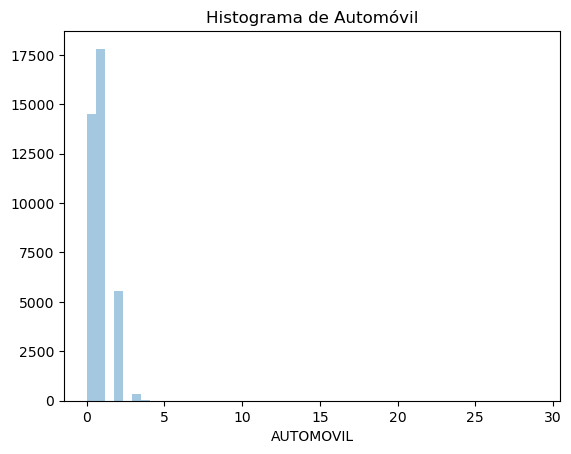

In [12]:
sns.distplot(auto, kde = False).set_title("Histograma de Automóvil")
plt.show()

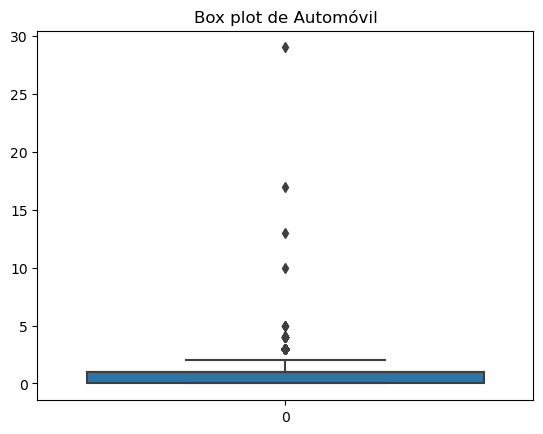

In [13]:
sns.boxplot(db_clean["AUTOMOVIL"]).set_title("Box plot de Automóvil")
plt.show()

<Axes: >

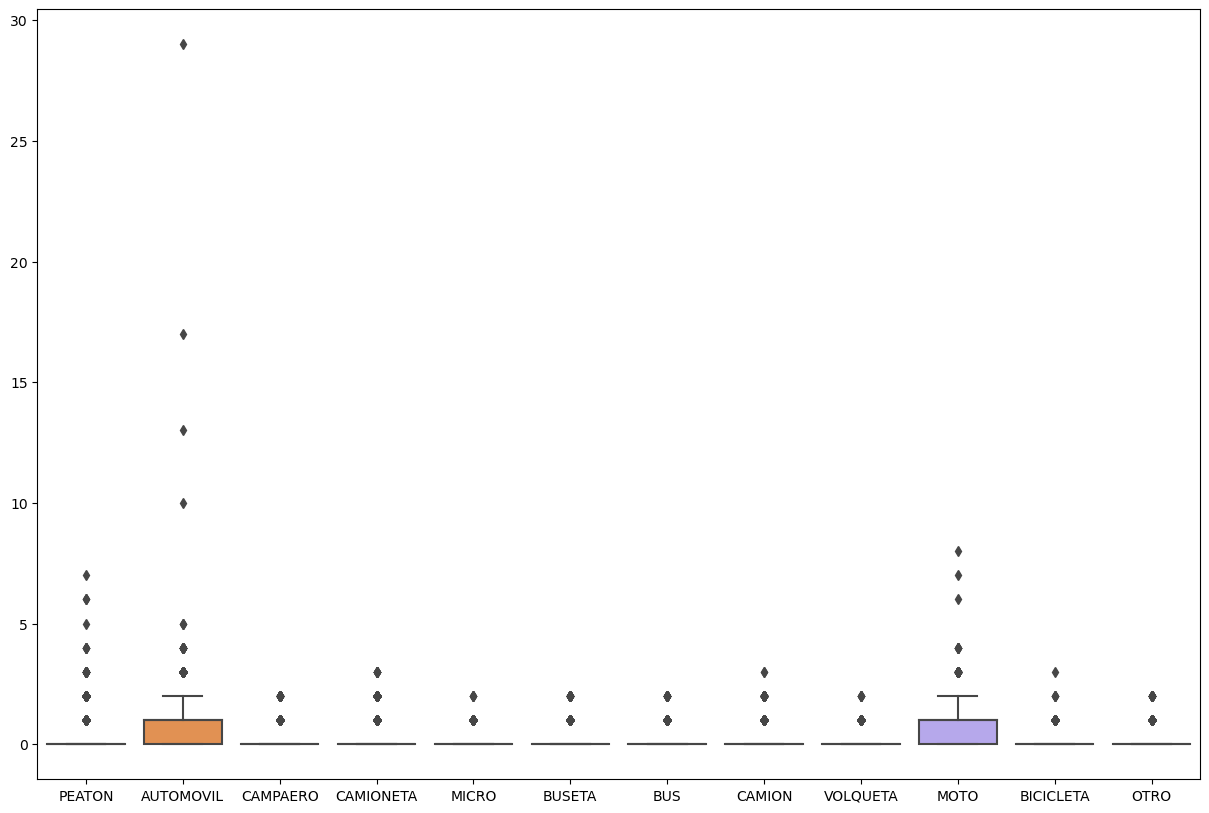

In [14]:
plt.figure(figsize=(15, 10)) #for wider
sns.boxplot(data = db_clean.loc[:, ['PEATON',
                                    'AUTOMOVIL',
                                    'CAMPAERO',
                                    'CAMIONETA',
                                    'MICRO',
                                    'BUSETA',
                                    'BUS',
                                    'CAMION',
                                    'VOLQUETA',
                                    'MOTO',
                                    'BICICLETA',
                                    'OTRO']])

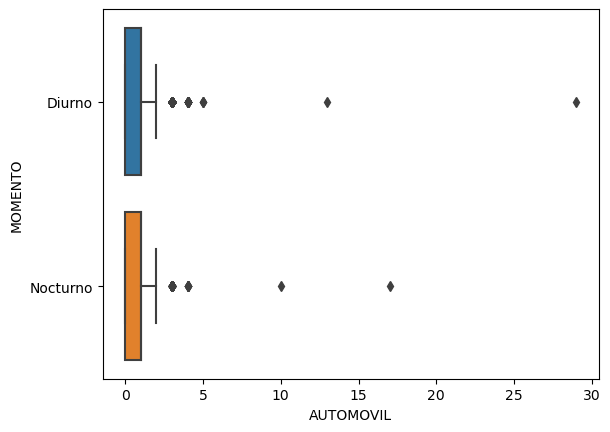

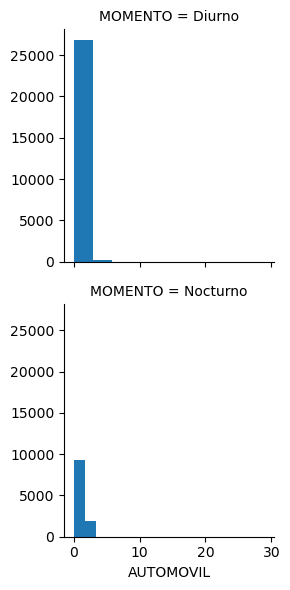

In [15]:
# Create a boxplot and histogram of the tips grouped by time of day
sns.boxplot(x = db_clean["AUTOMOVIL"], y = db_clean["MOMENTO"])

auto = sns.FacetGrid(db_clean, row = "MOMENTO")
auto = auto.map(plt.hist, "AUTOMOVIL")
plt.show()

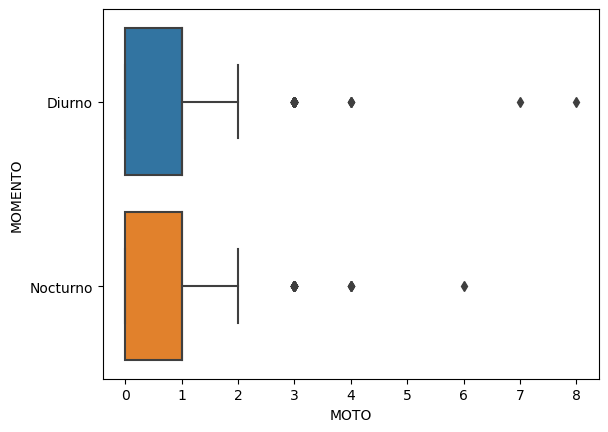

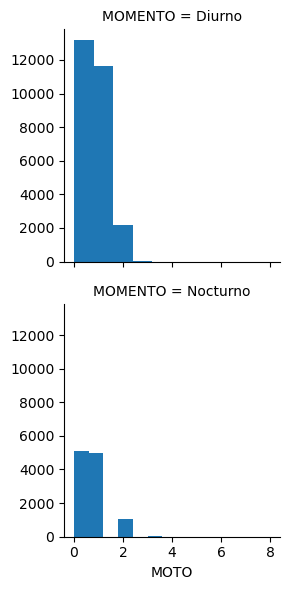

In [16]:
# Create a boxplot and histogram of the tips grouped by time of day
sns.boxplot(x = db_clean["MOTO"], y = db_clean["MOMENTO"])

moto = sns.FacetGrid(db_clean, row = "MOMENTO")
moto = moto.map(plt.hist, "MOTO")
plt.show()

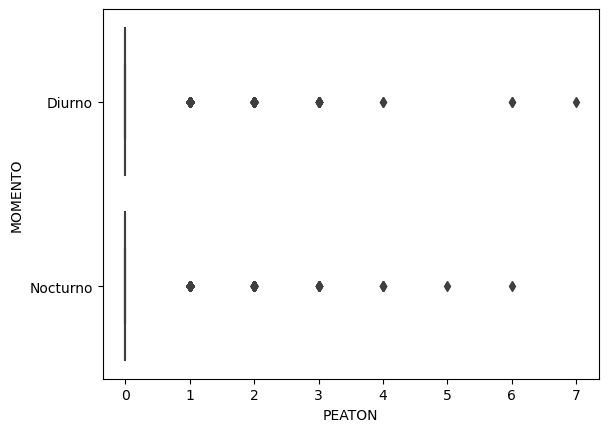

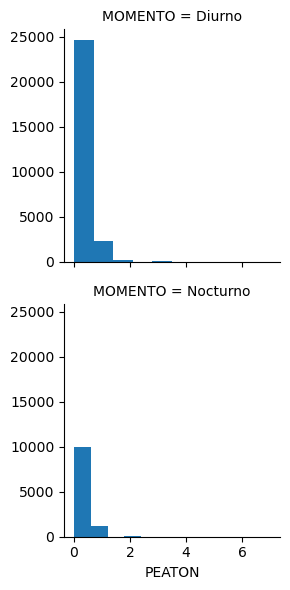

In [17]:
# Create a boxplot and histogram of the tips grouped by time of day
sns.boxplot(x = db_clean["PEATON"], y = db_clean["MOMENTO"])

peaton = sns.FacetGrid(db_clean, row = "MOMENTO")
peaton = peaton.map(plt.hist, "PEATON")
plt.show()

In [18]:
#Haga el favor de interpretar (Video hitogramas boxplot y todo eso, semana 2)